In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import requests

In [2]:
df_tau_prev = pd.read_csv('data/2000/tau_ij.csv', dtype={0:str}, index_col=0)
df_t_prev = pd.read_csv('data/2000/t_ij.csv', dtype={0:str}, index_col=0)
df_tau_next = pd.read_csv('data/2020/tau_ij.csv', dtype={0:str}, index_col=0)
df_t_next = pd.read_csv('data/2020/t_ij.csv', dtype={0:str}, index_col=0)
gdf_jcode = gpd.read_file('data/setup_2000_2020/jcode.geojson')

In [3]:
df = pd.DataFrame(((df_t_prev - df_t_next)*df_t_prev).unstack()).reset_index(names=['ori_jcode','dst_jcode'])
df = df.merge(gdf_jcode[['jcode','N03_004']], left_on='ori_jcode', right_on='jcode').drop(columns='jcode')
df = df.merge(gdf_jcode[['jcode','N03_004']], left_on='dst_jcode', right_on='jcode').drop(columns='jcode')

In [4]:
df

,ori_jcode,dst_jcode,0,N03_004_x,N03_004_y
0,08220,08220,-0.000046,つくば市,つくば市
1,08224,08220,-0.000374,守谷市,つくば市
2,08235,08220,-0.000094,つくばみらい市,つくば市
3,11203,08220,0.000000,川口市,つくば市
4,11204,08220,0.000000,浦和市,つくば市
...,...,...,...,...,...
12316,14207,14216,0.000487,茅ヶ崎市,座間市
12317,14209,14216,0.000692,相模原市,座間市
12318,14213,14216,-0.000025,大和市,座間市
12319,14215,14216,-0.000071,海老名市,座間市


In [5]:
df[df[0]>0].to_csv('data/2000_2020_diff.csv')

array([[<Axes: title={'center': '0'}>]], dtype=object)

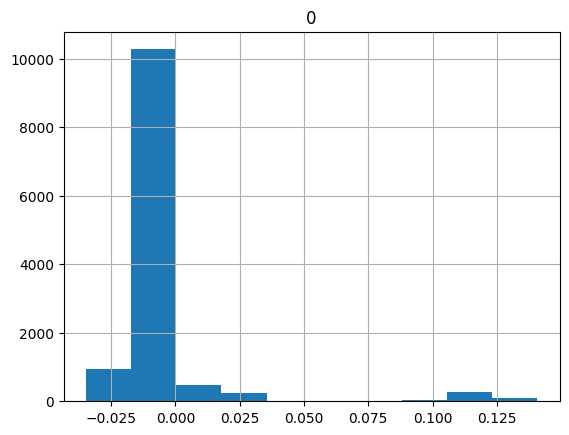

In [6]:
pd.DataFrame(np.ravel(df[0])).hist()

In [34]:
df_time_ij_sim.reset_index().query('ori_jcode in @list_tx').index

Index([0, 1, 2, 17, 19, 29, 30], dtype='int64')

In [22]:
list_tx = ['08220','08224','08235','12217','12220','11237','11234']
df_time_ij_sim = df_t_next.copy()
df_time_ij_sim.loc[:,list_tx] = df_t_prev.loc[:,list_tx]
df_time_ij_sim.loc[list_tx,:] = df_t_prev.loc[list_tx,:]
# df_time_ij_sim.loc[list_tx,list_tx] = df_time_ij_sim.loc[list_tx,list_tx]/0.50
df_time_ij_sim

,08220,08224,08235,11203,11204,11205,11208,11219,11220,11221,...,14135,14136,14137,14204,14205,14207,14209,14213,14215,14216
ori_jcode,,,,,,,,,,,,,,,,,,,,,
08220,0.003500,0.013069,0.006569,0.375000,0.375000,0.375000,0.375000,0.118056,0.375000,0.375000,...,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000
08224,0.012458,0.012951,0.007243,0.069444,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,...,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000
08235,0.006264,0.007486,0.016771,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,...,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000
11203,0.375000,0.072917,0.375000,0.041667,0.033736,0.041667,0.375000,0.375000,0.026667,0.375000,...,0.062500,0.375000,0.375000,0.111111,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000
11204,0.375000,0.375000,0.375000,0.043181,0.019076,0.020354,0.027778,0.049465,0.017715,0.041667,...,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14207,0.375000,0.375000,0.375000,0.375000,0.094444,0.375000,0.375000,0.375000,0.096528,0.375000,...,0.375000,0.375000,0.375000,0.040111,0.031451,0.019722,0.026465,0.053465,0.043979,0.055556
14209,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,...,0.375000,0.375000,0.041667,0.375000,0.375000,0.023472,0.173847,0.042424,0.059292,0.082722
14213,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,...,0.045000,0.030097,0.041632,0.051389,0.031167,0.051215,0.051972,0.024278,0.035611,0.039951


In [31]:
df_time_ij_sim.loc[list_tx,:] - df_t_next.loc[list_tx,:]['08220']

,08220,08224,08235,11203,11204,11205,11208,11219,11220,11221,...,14135,14136,14137,14204,14205,14207,14209,14213,14215,14216
ori_jcode,,,,,,,,,,,,,,,,,,,,,
08220,-0.013007,-0.007764,-0.014264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08224,-0.004049,-0.007882,-0.013590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08235,-0.010243,-0.013347,-0.004062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12217,0.043590,0.021653,0.027778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12220,0.358493,-0.006944,0.354167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11237,0.358493,0.010417,-0.005777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11234,0.358493,0.012736,-0.010416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
df_time_ij_sim.to_csv('data/2020/t_ij_sim.csv')